In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import math

# 데이터 준비

In [6]:
df = pd.read_csv("./data/auto-mpg.csv", header=None)
df.columns = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
    "name",
]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    df["mpg"], df["weight"], random_state=123, test_size=0.25
)

In [57]:
lr = LinearRegression()

In [58]:
x_train = np.reshape(x_train.values, (-1, 1))
y_train = np.reshape(y_train.values, (-1, 1))

In [59]:
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
lr.predict([[50.0]])

array([[606.11844583]])

In [61]:
print(lr.coef_, lr.intercept_)
#

[[-89.70988426]] [5091.61265905]


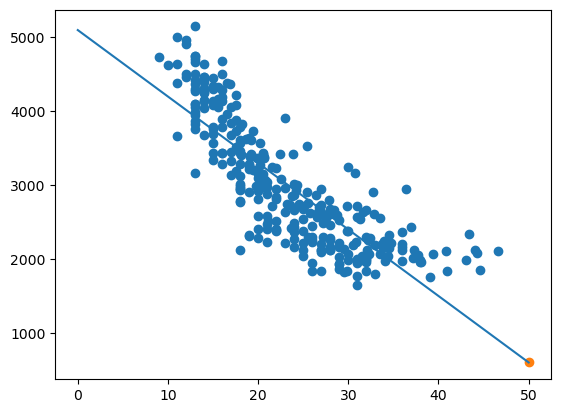

In [66]:
plt.figure()
plt.scatter(x_train, y_train)
plt.plot([0, 50], [lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.scatter(50, 606)

In [51]:
x_test = np.reshape(x_test, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
print("score: ", lr.score(x_test, y_test))

pred = lr.predict(x_test)
mae = mean_squared_error(y_test, pred)

print("mae : ", mae)

score:  0.7014780311378872
mae :  205949.7040200473


In [52]:
df["mgp_squared"] = df["mpg"] ** 2

In [174]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["mpg", "mgp_squared"]], df["weight"], random_state=123, test_size=0.25
)

In [175]:
lr.fit(x_train, y_train)

LinearRegression()

In [178]:
lr.predict([[50, 2500]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7286.0471902])

In [177]:
print(lr.coef_, lr.intercept_)

[-294.01743833    4.03575366] 7407.9681017456805


- 회귀곡선 : 3.94 * (mpg**2) + -289.4 * mgp + 7363.96

In [173]:
# 다항회귀 시각화
points = np.arange(51)
pointsy = np.log10(points)
plt.scatter(x_train["mpg"], y_train)
plt.plot(points, -289.4 + 3.94 * pointsy + lr.intercept_)
plt.scatter(50, 2744.85)

plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()

C:\Users\ITSC\AppData\Local\Temp\ipykernel_12948\3157687979.py:3: RuntimeWarning: divide by zero encountered in log10
  pointsy = np.log10(points)


KeyError: 'mpg'

In [85]:
lr.score(x_test, y_test)

0.7943964324981354

In [86]:
pred = lr.predict(x_test)

mae = mean_squared_error(y_test, pred)
mae

141845.48639377864

In [103]:
df["mpg_log"] = np.log10(df["mpg"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mgp_squared,mpg_log
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,324.0,1.255273
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,225.0,1.176091
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,324.0,1.255273
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,256.0,1.204120
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,289.0,1.230449


In [179]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["mpg", "mpg_log"]], df["weight"], random_state=123, test_size=0.25
)

In [180]:
lr.fit(x_train, y_train)

LinearRegression()

In [186]:
lr.predict([[50, math.log10(50)]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2028.16612317])

In [182]:
print(lr.coef_, lr.intercept_)

[   102.03448975 -10349.25105564] 14509.508746691616


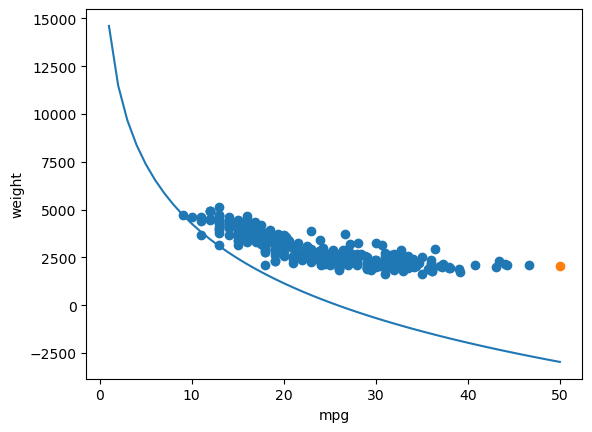

In [190]:
points = np.arange(1, 51)
pointsy = np.log10(points)
plt.scatter(x_train["mpg"], y_train)
plt.plot(points, 102 + -10349 * pointsy + 14509)
plt.scatter(50, 2034)

plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()
# y = log10 x

In [191]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df = df.dropna(subset=["horsepower"], axis=0)

C:\Users\ITSC\AppData\Local\Temp\ipykernel_12948\1912296552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"] = df["horsepower"].replace("?", np.nan)


In [192]:
df["horsepower"] = df["horsepower"].astype("float64")

In [193]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mgp_squared,mpg_log
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,324.0,1.255273
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,225.0,1.176091
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,324.0,1.255273
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,256.0,1.204120
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,289.0,1.230449


In [194]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
mgp_squared     float64
mpg_log         float64
dtype: object

## 변수선택

In [195]:
df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [196]:
ndf = df[["mpg", "cylinders", "horsepower", "weight"]]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [197]:
ndf.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


# 데이터셋 분할

In [198]:
x = ndf.drop("mpg", axis=1)  # 독립변수 x1, x2, x3
y = ndf[["mpg"]]  # 종속변수 y

In [199]:
# train data 와 test data 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=8  # 독립변수  # 종속변수  # 테스트데이터 25%
)  # 랜덤추출값

In [200]:
print(len(x_train), len(x_test))

294 98


# 선형회귀 모델링

In [201]:
# 선형회귀 모델링 객체 생성
lr = LinearRegression()

In [202]:
lr.fit(x_train, y_train)

LinearRegression()

## 모델 해석 및 평가

In [203]:
# 결정계수 (R제곱)
r_square = lr.score(x_test, y_test)
r_square

0.6637905334920755

In [204]:
# 회귀식의 기울기
lr.coef_

array([[-0.55969279, -0.03151424, -0.00554943]])

In [205]:
# 회귀식의 y절편
lr.intercept_

array([46.272067])

In [206]:
# 모형에 x_test를 입력하여 에측한 값을 실제값과 비교
y_pred = lr.predict(x_test)

In [208]:
mse = mean_squared_error(y_test, y_pred, squared=True)
mse

21.265040113517063

In [209]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

4.6114032694524845

In [210]:
pd.DataFrame({"ans": y_test["mpg"], "pred": y_pred.flatten()})

,ans,pred
299,27.2,24.093088
177,23.0,26.089266
8,14.0,10.147572
165,20.0,20.453229
256,20.5,20.727925
...,...,...
209,19.0,23.113391
244,43.1,31.504984
93,14.0,13.554434
205,28.0,29.710696


## 모델 평가 시각화

### 예측값과 정답값 비교 산점도

- 모델의 예측이 실제값과 얼마나 밀접하게 일치하는지 평가
- 완벽한 모델은 모든점이 대각선 위에 놓여있는 것

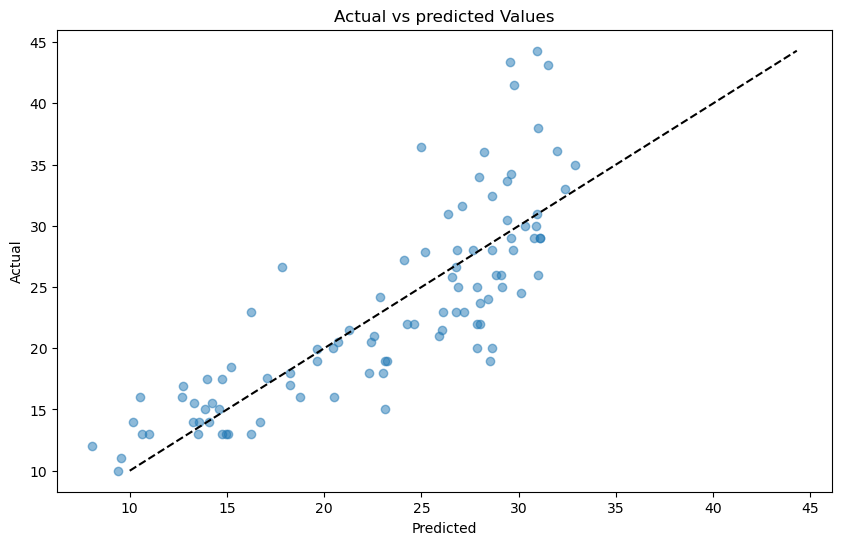

In [211]:
plt.figure(figsize=(10, 6))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs predicted Values")
plt.show()

### 잔차도

- 잔차의 패턴을 식별하는 데 도움
- 이상적으로는 잔차가 0 주위에 무작위로 흩어져 있어야 하며, 이는 모델의 오류가 무작위임을 나타냄

In [212]:
# 잔차
residuals = y_test - y_pred

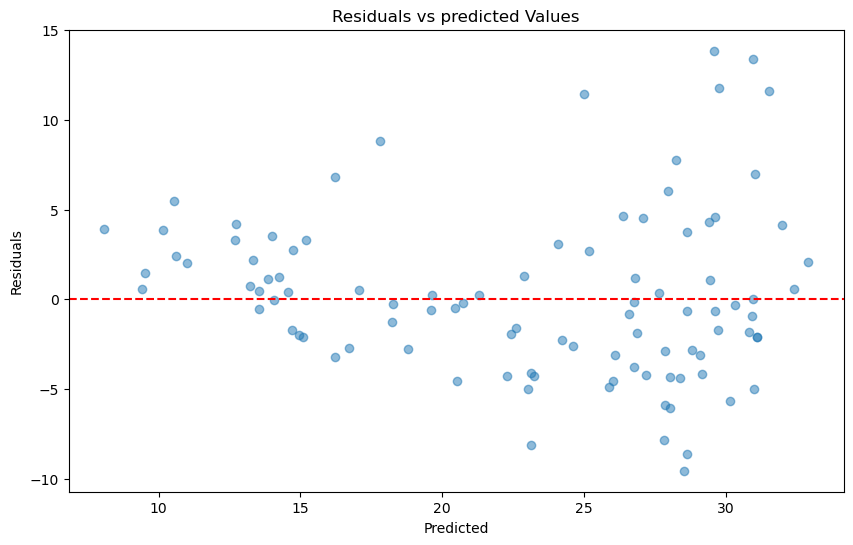

In [213]:
plt.figure(figsize=(10, 6))

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs predicted Values")
plt.show()

### QQ plot

- 잔차 분포를 정규 분포와 비교
- 잘 맞는 모델에서는 점들이 대략 대각선을 따라 위치해야 함

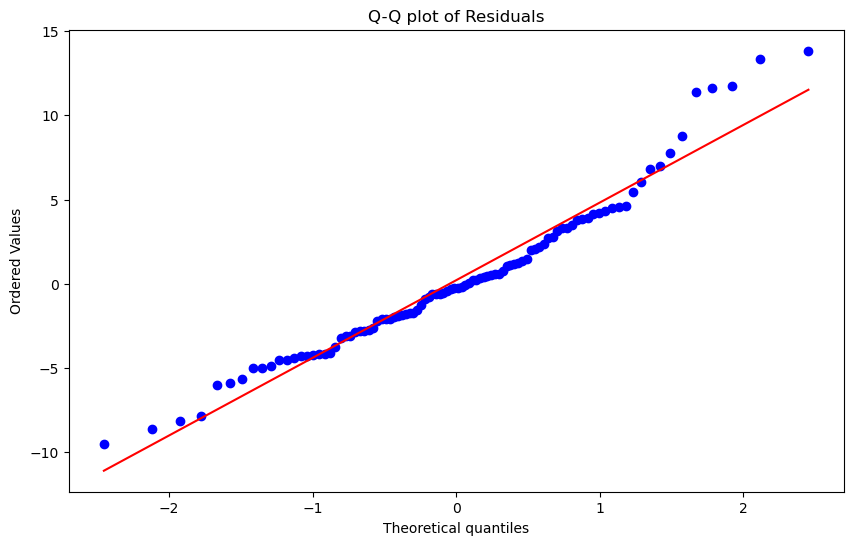

In [218]:
plt.figure(figsize=(10, 6))


stats.probplot(residuals.values.flatten(), dist="norm", plot=plt)

plt.title("Q-Q plot of Residuals")
plt.show()

### 잔차 히스토그램
- 잔차 분포에 대한 또 다른 시각을 제공
- 잘 맞는 모델의 경우 0을 중심으로 하는 전규 분포를 볼 수 있음

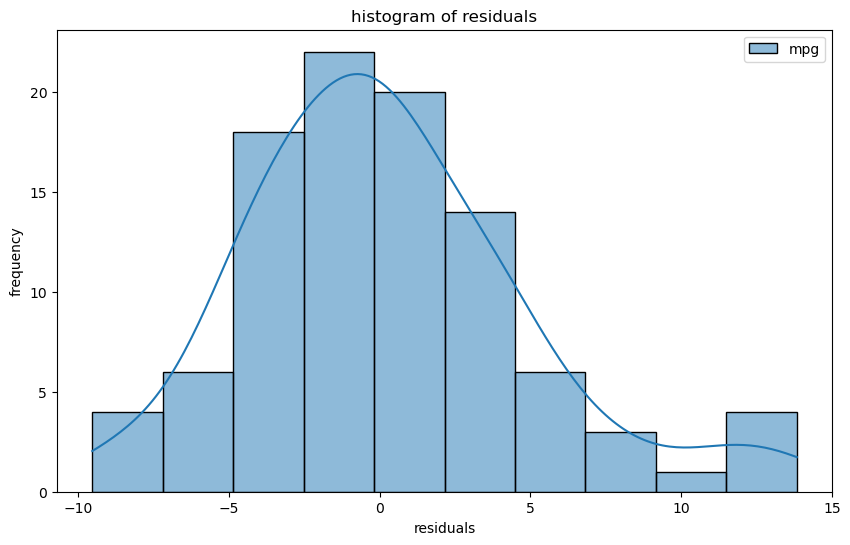

In [215]:
plt.figure(figsize=(10, 6))

sns.histplot(residuals, kde=True)

plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("histogram of residuals")
plt.show()